<a href="https://colab.research.google.com/github/mxnlmn/ML4.4_PW/blob/main/%D0%A2%D0%B8%D0%BC%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9F%D0%A0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практична робота 9 Тимошенко Володимир

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

Параметри

In [5]:
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100
n_hidden_1 = 128
n_hidden_2 = 256

Завантаження даних

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


Нормалізація значень пікселів до діапазону [0, 1]

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0


Побудова нейронної мережі

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(n_hidden_1, activation='relu'))
model.add(layers.Dense(n_hidden_2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Компіляція моделі

In [7]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тренування моделі


In [8]:
history = model.fit(train_images, train_labels, epochs=training_steps, batch_size=batch_size,
                    validation_data=(test_images, test_labels))

Streaming output truncated to the last 5000 lines.
235/235 [==============================] - 2s 10ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 1.2356 - val_accuracy: 0.8923
Epoch 502/3000
235/235 [==============================] - 2s 9ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 1.2067 - val_accuracy: 0.8938
Epoch 503/3000
235/235 [==============================] - 2s 9ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 1.2263 - val_accuracy: 0.8926
Epoch 504/3000
235/235 [==============================] - 2s 10ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.2270 - val_accuracy: 0.8937
Epoch 505/3000
235/235 [==============================] - 3s 12ms/step - loss: 4.1188e-04 - accuracy: 0.9999 - val_loss: 1.2401 - val_accuracy: 0.8957
Epoch 506/3000
235/235 [==============================] - 3s 13ms/step - loss: 1.3350e-04 - accuracy: 1.0000 - val_loss: 1.2533 - val_accuracy: 0.8958
Epoch 507/3000
235/235 [==============================] - 2s 10ms/step - los

Оцінка точності моделі на тестових даних

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 2.5565 - accuracy: 0.8935
Test Accuracy: 0.8934999704360962


Графіки функції втрат та точності

In [10]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Графік функції втрат

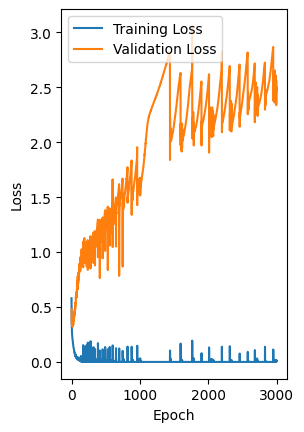

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Графік точності

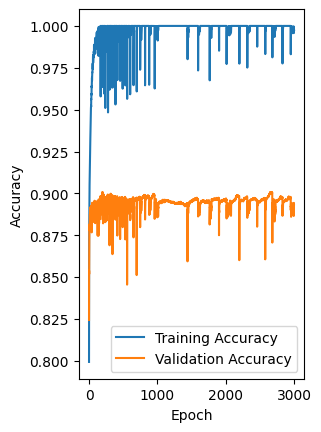

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Виведення 10 випадкових зображень

In [13]:
random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

Виведення зображень та їхніх класів

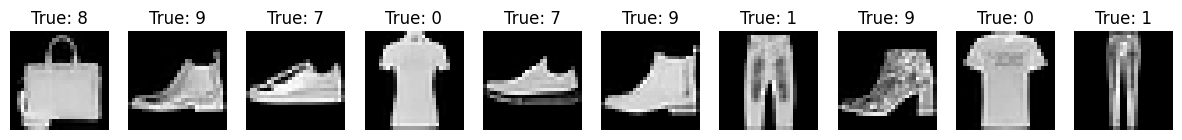

In [14]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f'True: {random_labels[i]}')
    plt.axis('off')

plt.show()

Виведення назви класу та передбачення для 10 випадкових зображень

In [15]:
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(10):
    print(f'True Label: {random_labels[i]}, Predicted Label: {predicted_labels[i]}')


1/1 [==============================] - 0s 92ms/step
True Label: 8, Predicted Label: 8
True Label: 9, Predicted Label: 9
True Label: 7, Predicted Label: 7
True Label: 0, Predicted Label: 0
True Label: 7, Predicted Label: 7
True Label: 9, Predicted Label: 9
True Label: 1, Predicted Label: 1
True Label: 9, Predicted Label: 9
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1


Виведення 10 помилково розпізнаних зображень

In [17]:
if len(incorrect_indices) > 0:
    incorrect_images = random_images[incorrect_indices]
    incorrect_true_labels = random_labels[incorrect_indices]
    incorrect_predicted_labels = predicted_labels[incorrect_indices]

    plt.figure(figsize=(15, 2))
    for i in range(min(10, len(incorrect_indices))):
        plt.subplot(1, 10, i+1)
        plt.imshow(incorrect_images[i], cmap='gray')
        plt.title(f'True: {incorrect_true_labels[i]}\nPredicted: {incorrect_predicted_labels[i]}')
        plt.axis('off')

    plt.show()
else:
    print("No incorrectly recognized images.")

No incorrectly recognized images.


Виведення матриці помилок

313/313 [==============================] - 2s 5ms/step


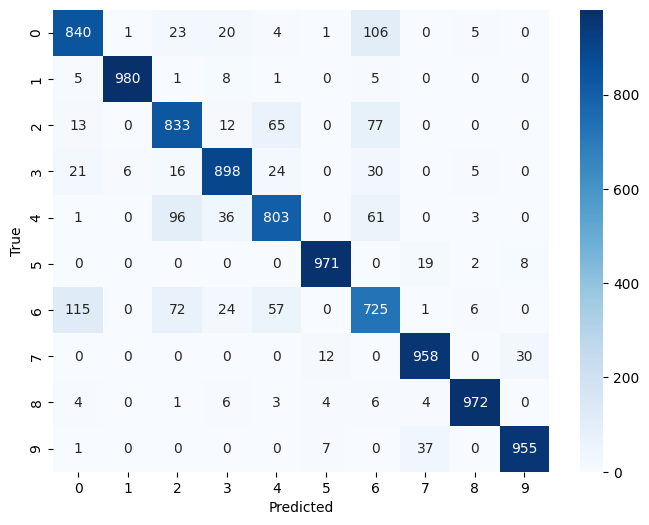

In [19]:
# Отримання прогнозів для тестових даних у вигляді ймовірностей
predictions_prob = model.predict(test_images)

# Отримання індексу класу з набору ймовірностей
predicted_labels = np.argmax(predictions_prob, axis=1)

# Виведення матриці помилок
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
